# AI6121 Computer Vision - Assignment 1 - Histogram Equalization

## Theory

Below content is from: [OpenCV: Histogram Equalization](https://docs.opencv.org/4.10.0/d4/d1b/tutorial_histogram_equalization.html).



### What is an Image Histogram?

It is a graphical representation of the intensity distribution of an image. It quantifies the number of pixels for each intensity value considered.

### What is Histogram Equalization?

It is a method that improves the contrast in an image, in order to stretch out the intensity range (see also the corresponding [Wikipedia entry](https://en.wikipedia.org/wiki/Histogram_equalization)).

### How does it work?

Equalization implies mapping one distribution (the given histogram) to another distribution (a wider and more uniform distribution of intensity values) so the intensity values are spread over the whole range.
To accomplish the equalization effect, the remapping should be the cumulative distribution function (cdf) (more details, refer to Learning OpenCV). For the histogram $H(i)$, its cumulative distribution $H'(i)$ is: $$H'(i)=\sum_{0\leqslant j<i}H(j)$$ To use this as a remapping function, we have to normalize $H'(i)$ such that the maximum value is 255 (or the maximum value for the intensity of the image).

Finally, we use a simple remapping procedure to obtain the intensity values of the equalized image: $$\text{equalized}(x,y)=H'(\text{src}(x,y))$$

## Code

```python
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.axes import Axes # for typing hints only

def histogram_equalization_grayscale(image: cv2.typing.MatLike) -> cv2.typing.MatLike:
    # 1. This is the simplest case, so convert the color image to grayscale.
    image_after: cv2.typing.MatLike = image.copy()
    if len(image.shape) != 2:               # grayscale images have shape (height, width)
        image_after = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # 2. Get all the scales of each pixel and find the unique ones.
    grayscale_flatten: list[int] = image_after.ravel().tolist()
    grayscale_unique: list[int] = list(set(grayscale_flatten))
    grayscale_unique.sort(reverse=False)    # grayscale should be from low to high

    # 3. Get the values of the mapping function.
    ROW, COL = image_after.shape
    PIXELS: int = ROW * COL                 # the total number of pixels of the image
    proportion_ugs: list[float] = []        # the proportion of pixels with such unique grayscale (probability mass function)
    pixels_counted: int = 0                 # the number of counted pixels
    proportion_counted: list[float] = []    # the proportion of counted pixels (cumulative mass function)
    grayscale_after: list[int] = []         # the mapped grayscale

    for ugs in grayscale_unique:                                        # ugs: unique grayscale
        ugs_count: int = grayscale_flatten.count(ugs)                   # count number of pixels with such ugs
        proportion_ugs.append(ugs_count / PIXELS)                       # get the proportion of the pixels
        pixels_counted += ugs_count                                     # make this number counted
        proportion_counted.append(pixels_counted / PIXELS)              # get the proportion of the counted
        grayscale_after.append(round(proportion_counted[-1] * 255))     # the grayscale of current ugs depends on the cumulative proportion

    # 4. Get the image after histogram equalization
    for i in range(ROW):
        for j in range(COL):
            index_gs: int = grayscale_unique.index(image_after[i][j])   # look up the grayscale value after mapping
            image_after[i][j] = grayscale_after[index_gs]               # write the value at the pixel

    return image_after

def show_image_gray(axis: Axes, image: cv2.typing.MatLike, title: str) -> None:
    axis.imshow(image, cmap='gray')
    axis.set_title(title)

def show_hist(axis: Axes, image: cv2.typing.MatLike, title: str) -> None:
    axis.hist(image.ravel(), 51) # 51 = 255 / 5
    axis.set_xlim(0, 255)        # Temporarily, no need to call axis.set_ylim(0, 100000)
    axis.set_title(title)

def main() -> None:
    SAMPLES_DIR: str = 'samples'
    filenames: list[str] = os.listdir(SAMPLES_DIR)
    images: list[str] = [f for f in filenames if '.jpg' in f]
    print('Possible images: ', images)
    len_images: int = len(images)
    _, axes = plt.subplots(len_images, 4, figsize=(20, 20))
    for i in range(len_images):
        image_path: str = os.path.join(SAMPLES_DIR, images[i])
        image: cv2.typing.MatLike = cv2.imread(image_path, cv2.IMREAD_COLOR)                # read the image from the given path
        image_before: cv2.typing.MatLike = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)          # convert the image from RGB to grayscale
        image_after: cv2.typing.MatLike = histogram_equalization_grayscale(image_before)    # get the HE-ed image
        show_image_gray(axes[i, 0], image_before, 'Before')
        show_image_gray(axes[i, 1], image_after, 'After')
        show_hist(axes[i, 2], image_before, 'Histogram Before')
        show_hist(axes[i, 3], image_after, 'Histogram After')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()
```


## Explanation and Result

This is a Jupyter Notebook so all the main process should be run globally.

1. Load all the required modules and define basic functions. The logic of the functions are commented inline.

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.axes import Axes # for typing hints only

def histogram_equalization_grayscale(image: cv2.typing.MatLike) -> cv2.typing.MatLike:
    # 1. This is the simplest case, so convert the color image to grayscale.
    image_after: cv2.typing.MatLike = image.copy()
    if len(image.shape) != 2:               # grayscale images have shape (height, width)
        image_after = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # 2. Get all the scales of each pixel and find the unique ones.
    grayscale_flatten: list[int] = image_after.ravel().tolist()
    grayscale_unique: list[int] = list(set(grayscale_flatten))
    grayscale_unique.sort(reverse=False)    # grayscale should be from low to high

    # 3. Get the values of the mapping function.
    ROW, COL = image_after.shape
    PIXELS: int = ROW * COL                 # the total number of pixels of the image
    proportion_ugs: list[float] = []        # the proportion of pixels with such unique grayscale (probability mass function)
    pixels_counted: int = 0                 # the number of counted pixels
    proportion_counted: list[float] = []    # the proportion of counted pixels (cumulative mass function)
    grayscale_after: list[int] = []         # the mapped grayscale

    for ugs in grayscale_unique:                                        # ugs: unique grayscale
        ugs_count: int = grayscale_flatten.count(ugs)                   # count number of pixels with such ugs
        proportion_ugs.append(ugs_count / PIXELS)                       # get the proportion of the pixels
        pixels_counted += ugs_count                                     # make this number counted
        proportion_counted.append(pixels_counted / PIXELS)              # get the proportion of the counted
        grayscale_after.append(round(proportion_counted[-1] * 255))     # the grayscale of current ugs depends on the cumulative proportion

    # 4. Get the image after histogram equalization
    for i in range(ROW):
        for j in range(COL):
            index_gs: int = grayscale_unique.index(image_after[i][j])   # look up the grayscale value after mapping
            image_after[i][j] = grayscale_after[index_gs]               # write the value at the pixel

    return image_after

def show_image_gray(axis: Axes, image: cv2.typing.MatLike, title: str) -> None:
    axis.imshow(image, cmap='gray')
    axis.set_title(title)

def show_hist(axis: Axes, image: cv2.typing.MatLike, title: str) -> None:
    axis.hist(image.ravel(), 51) # 51 = 255 / 5
    axis.set_xlim(0, 255)        # Temporarily, no need to call axis.set_ylim(0, 100000)
    axis.set_title(title)

2. Read all the filenames of images given in the sample directory. **NOTE: Different for everyone! Change the const strings before running this code!**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
SAMPLES_DIR: str = 'drive/MyDrive/NTU-AI6121-Assignment-1'
filenames: list[str] = os.listdir(SAMPLES_DIR)
images: list[str] = [f for f in filenames if '.jpg' in f]
print('Possible images: ', images)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Possible images:  ['sample06.jpg', 'sample05.jpg', 'sample08.jpg', 'sample07.jpg', 'sample01.jpg', 'sample02.jpg', 'sample03.jpg', 'sample04.jpg']


3. For each image, treat it as a grayscale image and run the process.

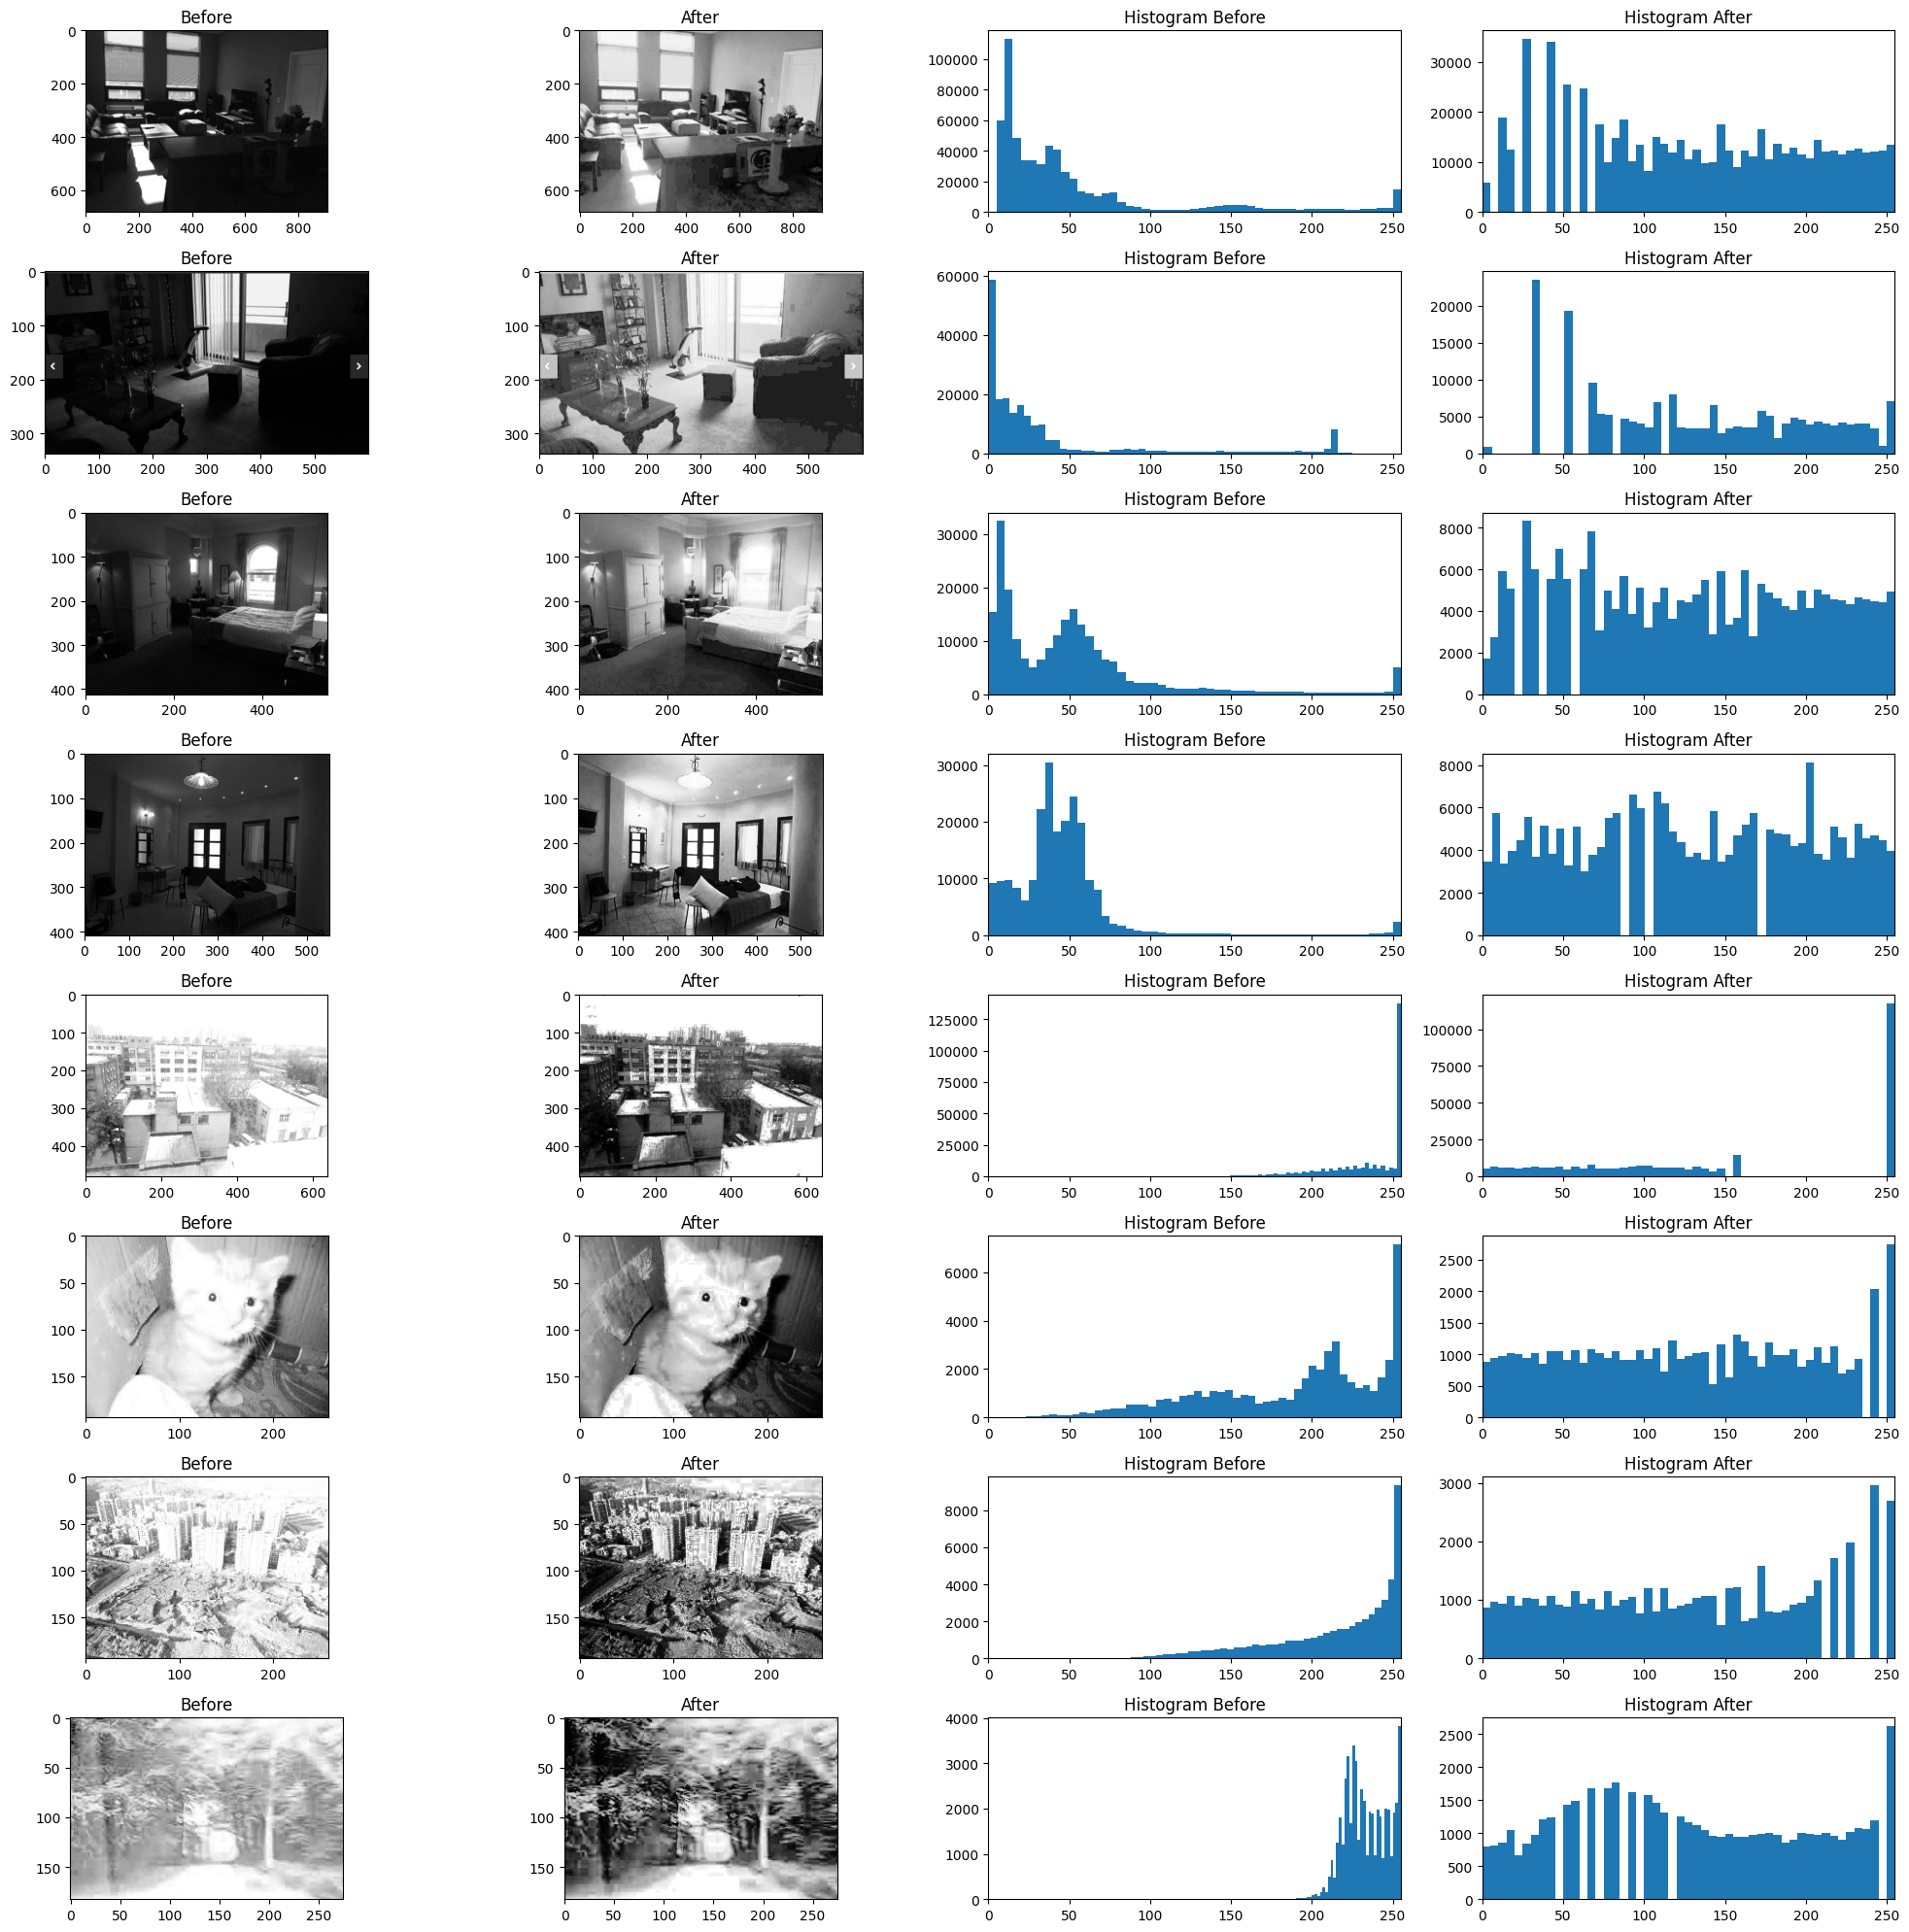

In [ ]:
len_images: int = len(images)
_, axes = plt.subplots(len_images, 4, figsize=(20, 20))
for i in range(len_images):
    image_path: str = os.path.join(SAMPLES_DIR, images[i])
    image: cv2.typing.MatLike = cv2.imread(image_path, cv2.IMREAD_COLOR)                # read the image from the given path
    image_before: cv2.typing.MatLike = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)          # convert the image from RGB to grayscale
    image_after: cv2.typing.MatLike = histogram_equalization_grayscale(image_before)    # get the HE-ed image
    show_image_gray(axes[i, 0], image_before, 'Before')
    show_image_gray(axes[i, 1], image_after, 'After')
    show_hist(axes[i, 2], image_before, 'Histogram Before')
    show_hist(axes[i, 3], image_after, 'Histogram After')

plt.tight_layout()
plt.show()